In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import array as arr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

In [11]:
x1_coords = [11,11,11,11,7,7,7,7,12.4,5.6,9,9,9,9,9,9,9,9,9,9,11]
x2_coords = [30,30,20,20,30,30,20,20,25,25,33.4,16.6,25,25,25,25,25,25,25,25,30]
u_list = [0.001886773,0.001888856,0.001839001,0.001840592,0.001861987,0.001858253,0.001799142,0.001809188,0.001869552,0.001828953,0.001876969,0.001792872,0.001852198,0.001849231,0.001860251,0.00184314,0.001878281,0.00185562,0.001851013,0.001839322,0.001886816]
u_values = [item * 10**6 for item in u_list]

n = len(u_values)

Y = np.array(u_values).reshape(-1, 1)
X = np.column_stack([x1_coords, x2_coords])

In [12]:
# Обучение модели
model = DecisionTreeRegressor(max_depth=30)
model.fit(X, Y)

DecisionTreeRegressor(max_depth=30)

In [15]:
# предсказание значений
predictions = model.predict(X)

In [16]:
# вычисляем rmse
e_hat = []
for i in range(0, n):
    e_hat.append((u_values[i] - predictions[i])**2)

sum_e = sum(e_hat)
rmse = round(sqrt((sum_e/n)),2)
print('rmse ', rmse)

rmse  7.1


In [28]:
# Поиск максимального значения по сетке:
x1_max = 12.4
x2_max = 33.4

x1 = 5.6
x2 = 16.6
y_max = 0

x1_list = []
x2_list = []
y_list = []


while x1 <= x1_max:
    while x2 <= x2_max:
        x = np.column_stack([x1, x2])
        y = model.predict(x)
        
        x1_list.append(x1)
        x2_list.append(x2)
        y_list.append(y)
        
        if(y>y_max):
            y_max = y
            x1_need = x1
            x2_need = x2
        x2 += 0.1
    x2 = 16.6
    x1 += 0.1

print('\n', 'Результат:')
print('y_max =',round(y_max[0],2), '\nx1 =',round(x1_need,2), '\nx2 =',round(x2_need,2))


 Результат:
y_max = 1887.48 
x1 = 10.1 
x2 = 27.6


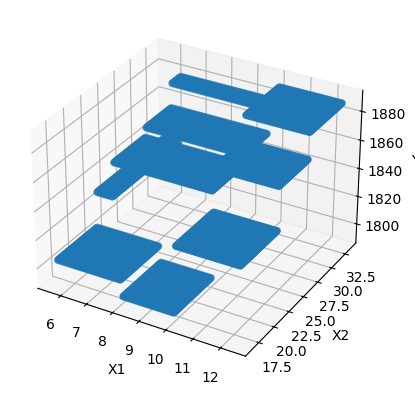

In [30]:
# График построенной модели
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_list, x2_list, y_list)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()